# Elecrticity Price Forecasting

#### Electricity Prices are determined by day ahead markets as a reference price to sell and buy electricity. Market organizer EPIAS announce the prices for tomorrow as 24 hours. To forecast and have a right position for the market player in the electiricty markets mainly depends on good price forecast in order to maximize profit and increase financial wealth.

<img src="https://th.bing.com/th/id/OIP.kjTH0MswpN7ztGDnFmj0FAHaD5?w=343&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7" width=400>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [59]:
df=pd.read_excel('final_electricity_data_cleaned-2020-2024_dataset-3.xlsx')

In [60]:
df.head()

,date,hour,price,priceUsd,priceEur,time,toplam,dogalgaz,ruzgar,linyit,tasKomur,ithalKomur,fuelOil,jeotermal,barajli,nafta,biokutle,akarsu,diger,time_lep,lep,time_rtc,consumption,time_uga,toplam_uga,ruzgar_uga,biyogaz,kanalTipi,biyokutle,gunes,diger_uga,Saat,ACWA,AKENRJ ERZIN,AKSA ANT,BAN1,BAN2,BAYMINA,BILGIN1,BILGIN2,BURSA BLOK1,BURSA BLOK2,CENGIZ,ENKA ADP,ENKA GBZ1,ENKA GBZ2,ENKA IZM1,ENKA IZM2,GAMA ICAN,HABAS,HAM-10,HAM-20,RWE,TEKIRA,TEKIRB,YENI,IST A-(A),IST A-(B),IST A-(C),IST B (Blok40+ Blok50)
0,2020-01-01T00:00:00+03:00,00:00,311.65,52.46,46.86,00:00,25725.50,5646.60,849.37,5331.5,276.0,6788.55,3.6,1032.9,3705.67,0.0,403.89,1458.12,229.3,00:00,29000.0,00:00,28125.46,2020-01-01T00:00:00+03:00,35.6921,1.1334,17.6226,3.3992,13.5220,0.0005,0.0144,00:00:00,861.1,70.0,565.0,0.0,479.0,0.0,0.0,0.0,555,600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,463.0,101.3,200,100,0.0,0,0,0,799
1,2020-01-01T01:00:00+03:00,01:00,313.24,52.73,47.10,01:00,24159.99,4731.56,826.17,5331.5,276.0,6790.55,3.6,1033.6,3073.17,0.0,405.52,1459.02,229.3,01:00,26000.0,01:00,26548.41,2020-01-01T01:00:00+03:00,33.9363,0.8541,17.1410,3.2394,12.6765,0.0066,0.0187,01:00:00,860.4,0.0,565.0,0.0,442.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,468.0,0.0,0,0,0.0,0,0,0,772
2,2020-01-01T02:00:00+03:00,02:00,311.08,52.37,46.77,02:00,22937.15,4535.73,798.83,5306.5,276.0,6789.55,3.6,1036.3,2124.32,0.0,406.02,1431.00,229.3,02:00,24500.0,02:00,25287.99,2020-01-01T02:00:00+03:00,34.6875,1.0839,16.8458,3.0966,13.5372,0.0667,0.0573,02:00:00,859.7,0.0,565.0,0.0,442.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0,0,0.0,0,0,0,590
3,2020-01-01T03:00:00+03:00,03:00,310.70,52.30,46.72,03:00,21972.48,3322.21,797.41,5249.0,276.0,6789.55,3.6,1037.3,2342.82,0.0,406.23,1519.06,229.3,03:00,23400.0,03:00,24311.53,2020-01-01T03:00:00+03:00,35.9314,1.5875,17.4890,2.9667,13.6103,0.1990,0.0789,03:00:00,80.0,0.0,565.0,0.0,100.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,436.0,0.0,0,0,0.0,0,0,0,520
4,2020-01-01T04:00:00+03:00,04:00,200.01,33.67,30.07,04:00,21451.33,2848.20,872.79,5360.6,0.0,6790.55,0.6,1040.1,2351.52,0.0,407.84,1549.83,229.3,04:00,22900.0,04:00,23730.48,2020-01-01T04:00:00+03:00,36.7922,2.2315,17.5215,2.8043,13.5898,0.5721,0.0730,04:00:00,0.0,0.0,565.0,0.0,0.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0,0,0.0,0,0,0,480


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44496 entries, 0 to 44495
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    44496 non-null  object 
 1   hour                    44496 non-null  object 
 2   price                   44496 non-null  float64
 3   priceUsd                44496 non-null  float64
 4   priceEur                44496 non-null  float64
 5   time                    44496 non-null  object 
 6   toplam                  44496 non-null  float64
 7   dogalgaz                44496 non-null  float64
 8   ruzgar                  44496 non-null  float64
 9   linyit                  44496 non-null  float64
 10  tasKomur                44496 non-null  float64
 11  ithalKomur              44496 non-null  float64
 12  fuelOil                 44496 non-null  float64
 13  jeotermal               44496 non-null  float64
 14  barajli                 44496 non-null

In [62]:
df.isnull().sum()

date                        0
hour                        0
price                       0
priceUsd                    0
priceEur                    0
time                        0
toplam                      0
dogalgaz                    0
ruzgar                      0
linyit                      0
tasKomur                    0
ithalKomur                  0
fuelOil                     0
jeotermal                   0
barajli                     0
nafta                       0
biokutle                    0
akarsu                      0
diger                       0
time_lep                   24
lep                        24
time_rtc                   24
consumption                27
time_uga                    0
toplam_uga                648
ruzgar_uga                648
biyogaz                   648
kanalTipi                 648
biyokutle                 648
gunes                     648
diger_uga                 648
Saat                        0
ACWA                        0
AKENRJ ERZ

In [66]:
print(df['date'].head())
print(df['date'].dtype)

0    2020-01-01 00:00:00+03:00
1    2020-01-01 01:00:00+03:00
2    2020-01-01 02:00:00+03:00
3    2020-01-01 03:00:00+03:00
4    2020-01-01 04:00:00+03:00
Name: date, dtype: object
object


In [68]:
import pytz

# Tarih sütununu datetime formatına dönüştür
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sadece tarih kısmını almak isterseniz:
df['date'] = df['date'].dt.date

In [72]:
# Date sütununu datetime formatına çevir
#df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Hatalı değerler varsa NaT yapar

# Yeni sütunları oluştur
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df['day_name'] = df['date'].dt.day_name()

In [77]:
import holidays

# Türkiye tatil takvimini oluştur
#tr_holidays = holidays.Turkey()

# Tatil sütununu oluştur
#df['holiday'] = df['date'].dt.date.apply(lambda x: 'holiday' if x in tr_holidays else 'working day')

In [79]:
df.head()

,date,hour,price,priceUsd,priceEur,time,toplam,dogalgaz,ruzgar,linyit,tasKomur,ithalKomur,fuelOil,jeotermal,barajli,nafta,biokutle,akarsu,diger,time_lep,lep,time_rtc,consumption,time_uga,toplam_uga,ruzgar_uga,biyogaz,kanalTipi,biyokutle,gunes,diger_uga,Saat,ACWA,AKENRJ ERZIN,AKSA ANT,BAN1,BAN2,BAYMINA,BILGIN1,BILGIN2,BURSA BLOK1,BURSA BLOK2,CENGIZ,ENKA ADP,ENKA GBZ1,ENKA GBZ2,ENKA IZM1,ENKA IZM2,GAMA ICAN,HABAS,HAM-10,HAM-20,RWE,TEKIRA,TEKIRB,YENI,IST A-(A),IST A-(B),IST A-(C),IST B (Blok40+ Blok50),year,month,day,day_name
0,2020-01-01,00:00,311.65,52.46,46.86,00:00,25725.50,5646.60,849.37,5331.5,276.0,6788.55,3.6,1032.9,3705.67,0.0,403.89,1458.12,229.3,00:00,29000.0,00:00,28125.46,2020-01-01T00:00:00+03:00,35.6921,1.1334,17.6226,3.3992,13.5220,0.0005,0.0144,00:00:00,861.1,70.0,565.0,0.0,479.0,0.0,0.0,0.0,555,600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,463.0,101.3,200,100,0.0,0,0,0,799,2020.0,1.0,1.0,Wednesday
1,2020-01-01,01:00,313.24,52.73,47.10,01:00,24159.99,4731.56,826.17,5331.5,276.0,6790.55,3.6,1033.6,3073.17,0.0,405.52,1459.02,229.3,01:00,26000.0,01:00,26548.41,2020-01-01T01:00:00+03:00,33.9363,0.8541,17.1410,3.2394,12.6765,0.0066,0.0187,01:00:00,860.4,0.0,565.0,0.0,442.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,468.0,0.0,0,0,0.0,0,0,0,772,2020.0,1.0,1.0,Wednesday
2,2020-01-01,02:00,311.08,52.37,46.77,02:00,22937.15,4535.73,798.83,5306.5,276.0,6789.55,3.6,1036.3,2124.32,0.0,406.02,1431.00,229.3,02:00,24500.0,02:00,25287.99,2020-01-01T02:00:00+03:00,34.6875,1.0839,16.8458,3.0966,13.5372,0.0667,0.0573,02:00:00,859.7,0.0,565.0,0.0,442.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0,0,0.0,0,0,0,590,2020.0,1.0,1.0,Wednesday
3,2020-01-01,03:00,310.70,52.30,46.72,03:00,21972.48,3322.21,797.41,5249.0,276.0,6789.55,3.6,1037.3,2342.82,0.0,406.23,1519.06,229.3,03:00,23400.0,03:00,24311.53,2020-01-01T03:00:00+03:00,35.9314,1.5875,17.4890,2.9667,13.6103,0.1990,0.0789,03:00:00,80.0,0.0,565.0,0.0,100.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,436.0,0.0,0,0,0.0,0,0,0,520,2020.0,1.0,1.0,Wednesday
4,2020-01-01,04:00,200.01,33.67,30.07,04:00,21451.33,2848.20,872.79,5360.6,0.0,6790.55,0.6,1040.1,2351.52,0.0,407.84,1549.83,229.3,04:00,22900.0,04:00,23730.48,2020-01-01T04:00:00+03:00,36.7922,2.2315,17.5215,2.8043,13.5898,0.5721,0.0730,04:00:00,0.0,0.0,565.0,0.0,0.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0,0,0.0,0,0,0,480,2020.0,1.0,1.0,Wednesday


In [83]:
df['residual']=df['consumption']-df['gunes']-df['ruzgar']-df['jeotermal']-df['akarsu']-df['biokutle']-df['linyit']-df['ithalKomur']-df['diger']

In [85]:
df.head()

,date,hour,price,priceUsd,priceEur,time,toplam,dogalgaz,ruzgar,linyit,tasKomur,ithalKomur,fuelOil,jeotermal,barajli,nafta,biokutle,akarsu,diger,time_lep,lep,time_rtc,consumption,time_uga,toplam_uga,ruzgar_uga,biyogaz,kanalTipi,biyokutle,gunes,diger_uga,Saat,ACWA,AKENRJ ERZIN,AKSA ANT,BAN1,BAN2,BAYMINA,BILGIN1,BILGIN2,BURSA BLOK1,BURSA BLOK2,CENGIZ,ENKA ADP,ENKA GBZ1,ENKA GBZ2,ENKA IZM1,ENKA IZM2,GAMA ICAN,HABAS,HAM-10,HAM-20,RWE,TEKIRA,TEKIRB,YENI,IST A-(A),IST A-(B),IST A-(C),IST B (Blok40+ Blok50),year,month,day,day_name,residual
0,2020-01-01,00:00,311.65,52.46,46.86,00:00,25725.50,5646.60,849.37,5331.5,276.0,6788.55,3.6,1032.9,3705.67,0.0,403.89,1458.12,229.3,00:00,29000.0,00:00,28125.46,2020-01-01T00:00:00+03:00,35.6921,1.1334,17.6226,3.3992,13.5220,0.0005,0.0144,00:00:00,861.1,70.0,565.0,0.0,479.0,0.0,0.0,0.0,555,600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,463.0,101.3,200,100,0.0,0,0,0,799,2020.0,1.0,1.0,Wednesday,12031.8295
1,2020-01-01,01:00,313.24,52.73,47.10,01:00,24159.99,4731.56,826.17,5331.5,276.0,6790.55,3.6,1033.6,3073.17,0.0,405.52,1459.02,229.3,01:00,26000.0,01:00,26548.41,2020-01-01T01:00:00+03:00,33.9363,0.8541,17.1410,3.2394,12.6765,0.0066,0.0187,01:00:00,860.4,0.0,565.0,0.0,442.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,468.0,0.0,0,0,0.0,0,0,0,772,2020.0,1.0,1.0,Wednesday,10472.7434
2,2020-01-01,02:00,311.08,52.37,46.77,02:00,22937.15,4535.73,798.83,5306.5,276.0,6789.55,3.6,1036.3,2124.32,0.0,406.02,1431.00,229.3,02:00,24500.0,02:00,25287.99,2020-01-01T02:00:00+03:00,34.6875,1.0839,16.8458,3.0966,13.5372,0.0667,0.0573,02:00:00,859.7,0.0,565.0,0.0,442.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0,0,0.0,0,0,0,590,2020.0,1.0,1.0,Wednesday,9290.4233
3,2020-01-01,03:00,310.70,52.30,46.72,03:00,21972.48,3322.21,797.41,5249.0,276.0,6789.55,3.6,1037.3,2342.82,0.0,406.23,1519.06,229.3,03:00,23400.0,03:00,24311.53,2020-01-01T03:00:00+03:00,35.9314,1.5875,17.4890,2.9667,13.6103,0.1990,0.0789,03:00:00,80.0,0.0,565.0,0.0,100.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,436.0,0.0,0,0,0.0,0,0,0,520,2020.0,1.0,1.0,Wednesday,8283.4810
4,2020-01-01,04:00,200.01,33.67,30.07,04:00,21451.33,2848.20,872.79,5360.6,0.0,6790.55,0.6,1040.1,2351.52,0.0,407.84,1549.83,229.3,04:00,22900.0,04:00,23730.48,2020-01-01T04:00:00+03:00,36.7922,2.2315,17.5215,2.8043,13.5898,0.5721,0.0730,04:00:00,0.0,0.0,565.0,0.0,0.0,0.0,0.0,0.0,350,420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0,0,0.0,0,0,0,480,2020.0,1.0,1.0,Wednesday,7478.8979


In [17]:
# Sadece belirtilen sütunlardaki boş değerleri kontrol ederek satırları sil
#columns_to_check = ['date', 'hour', 'price', 'gunes', 'ruzgar', 'lep']
#df = df.dropna(subset=columns_to_check)

# Sonuçları kontrol et
#df.isnull().sum() # Kalan boşlukları kontrol edin

In [87]:
print(df['date'].dtype)

datetime64[ns]


In [124]:
df.isnull().sum()

date        672
hour          0
price         0
priceUsd      0
priceEur      0
           ... 
year        672
month       672
day         672
day_name    672
residual    648
Length: 65, dtype: int64

In [126]:
# NaN içeren satırları sil
df = df.dropna()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 0 to 43823
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    43824 non-null  datetime64[ns]
 1   hour                    43824 non-null  object        
 2   price                   43824 non-null  float64       
 3   priceUsd                43824 non-null  float64       
 4   priceEur                43824 non-null  float64       
 5   time                    43824 non-null  object        
 6   toplam                  43824 non-null  float64       
 7   dogalgaz                43824 non-null  float64       
 8   ruzgar                  43824 non-null  float64       
 9   linyit                  43824 non-null  float64       
 10  tasKomur                43824 non-null  float64       
 11  ithalKomur              43824 non-null  float64       
 12  fuelOil                 43824 non-null  float64    

In [91]:
df.corr(numeric_only=True)

,price,priceUsd,priceEur,toplam,dogalgaz,ruzgar,linyit,tasKomur,ithalKomur,fuelOil,jeotermal,barajli,nafta,biokutle,akarsu,diger,lep,consumption,toplam_uga,ruzgar_uga,biyogaz,kanalTipi,biyokutle,gunes,diger_uga,ACWA,AKENRJ ERZIN,AKSA ANT,BAN1,BAN2,BAYMINA,BILGIN1,BILGIN2,BURSA BLOK1,BURSA BLOK2,CENGIZ,ENKA ADP,ENKA GBZ1,ENKA GBZ2,ENKA IZM1,ENKA IZM2,GAMA ICAN,HABAS,HAM-10,HAM-20,RWE,TEKIRA,TEKIRB,YENI,IST A-(A),IST A-(B),IST A-(C),IST B (Blok40+ Blok50),year,month,day,residual
price,1.000000,0.843379,0.850633,0.281273,0.061769,0.075571,0.260249,0.360619,0.492326,0.347982,0.042470,-0.050481,0.001345,0.730864,-0.141655,0.124651,0.346364,0.338784,0.003427,-0.031076,-0.617067,0.318803,-0.770872,0.004989,0.166713,0.117395,0.155789,0.003676,0.022997,0.025826,0.434257,0.057355,0.147375,-0.236391,-0.057333,0.146040,0.085938,0.137309,0.069192,0.106565,0.171373,0.076680,-0.225821,-0.074294,0.074607,-0.021841,-0.089517,-0.153949,0.108164,-0.227848,-0.179245,-0.093941,0.198876,0.671953,0.182741,0.014880,0.153934
priceUsd,0.843379,1.000000,0.997604,0.199997,0.176092,-0.009502,0.302717,0.224210,0.270912,0.174626,0.062513,-0.129623,0.009396,0.390418,-0.111529,0.026042,0.283596,0.263019,-0.071911,-0.076924,-0.175881,0.332618,-0.702039,-0.069649,-0.040147,0.121198,0.161095,0.014641,0.165481,0.149016,0.363031,0.044745,0.133592,-0.143998,0.018408,0.178839,0.186641,0.190003,0.141121,0.262776,0.265458,0.226182,-0.121402,-0.083474,0.022625,-0.004497,0.129953,-0.047805,0.176587,-0.063424,-0.085404,0.042968,0.179284,0.266806,0.099004,0.010708,0.229587
priceEur,0.850633,0.997604,1.000000,0.181961,0.149373,-0.003181,0.284820,0.226936,0.274174,0.168614,0.054876,-0.128172,0.006307,0.393157,-0.110555,0.029681,0.266416,0.244963,-0.065271,-0.068457,-0.184387,0.329235,-0.715729,-0.063028,-0.034636,0.105344,0.151089,-0.005384,0.146239,0.131118,0.345914,0.027735,0.115119,-0.160909,0.020620,0.164195,0.168030,0.169676,0.115713,0.242014,0.252364,0.212051,-0.143801,-0.110303,0.020303,-0.019826,0.125199,-0.069544,0.158788,-0.067268,-0.085709,0.036972,0.168376,0.270676,0.110796,0.010537,0.201567
toplam,0.281273,0.199997,0.181961,1.000000,0.637138,0.239016,0.313829,0.246629,0.468813,0.107880,-0.306734,0.420752,-0.016813,0.188191,-0.181744,0.087434,0.884883,0.911777,0.038935,0.151703,-0.179719,-0.020696,0.000430,0.038781,0.008028,0.475250,0.457984,0.403304,0.471674,0.377412,0.469759,0.467413,0.451758,0.352579,0.296984,0.422848,0.320408,0.365006,0.343144,0.293967,0.306875,0.391131,0.367130,0.330148,0.330443,0.430798,0.222415,0.230164,0.444689,0.127260,0.102576,0.173060,0.385010,0.171832,0.116748,0.010287,0.823986
dogalgaz,0.061769,0.176092,0.149373,0.637138,1.000000,-0.193977,0.355546,0.117877,0.251751,0.039438,-0.175596,-0.154844,-0.006849,-0.118747,-0.502840,-0.029256,0.572938,0.580533,-0.050599,-0.186013,0.206673,-0.256653,0.202165,-0.047456,-0.322139,0.678226,0.613080,0.572968,0.676016,0.628352,0.583284,0.643735,0.586475,0.658708,0.640905,0.631627,0.546080,0.567406,0.574040,0.510084,0.464639,0.562966,0.676145,0.558043,0.514953,0.570349,0.552480,0.526319,0.580012,0.477641,0.373070,0.429764,0.545402,-0.182127,0.269172,0.020212,0.812421
ruzgar,0.075571,-0.009502,-0.003181,0.239016,-0.193977,1.000000,0.071171,0.089021,0.056815,-0.050419,-0.034052,-0.057454,-0.002047,0.235467,-0.090775,0.005625,0.183073,0.191706,-0.043394,0.849573,-0.207622,0.081214,-0.137144,-0.047144,0.056663,-0.194210,-0.128805,-0.107282,-0.198387,-0.228860,-0.066239,-0.078132,-0.046215,-0.022385,-0.028281,-0.140838,-0.100456,-0.094473,-0.096818,-0.040866,-0.046118,-0.163422,-0.123424,-0.141565,-0.151855,-0.135140,-0.059156,-0.060155,-0.070523,-0.152502,-0.170960,-0.085228,-0.082468,0.223886,0.033692,-0.021434,-0.171110
linyit,0.260249,0.302717,0.284820,0.313829,0.355546,0.071171,1.000000,0.324472,0.318895,0.039290,0.064233,-0.282839,0.021085,0.217070,-0.392928,0.029489,0.323514,0.334862,-0.039719,-0.027569,-0.109860,0.008675,-0.090553,-0.037727,-0.148922,0.228188,0.228580,0.164844,0.229972,0.204700,

In [93]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,43824,2022-07-01 12:00:00,2020-01-01 00:00:00,2021-04-01 00:00:00,2022-07-01 12:00:00,2023-10-01 00:00:00,2024-12-30 00:00:00,NaN
price,44496.0,1558.098906,0.0,330.0175,1514.82,2450.01,4800.0,1175.845776
priceUsd,44496.0,81.38622,0.0,44.3175,70.95,95.5525,264.17,51.104236
priceEur,44496.0,75.149804,0.0,38.14,63.67,87.1,271.63,50.697983
toplam,44496.0,32163.689621,16085.56,28360.775,32127.285,35753.1925,49504.01,5106.453366
dogalgaz,44496.0,7826.880937,33.39,4549.595,8089.595,10761.9025,17873.32,4060.98795
ruzgar,44496.0,3614.821702,177.35,1879.6375,3309.93,5081.52,10081.15,2070.254531
linyit,44496.0,4222.862297,1566.2,3915.0975,4268.1,4581.4,5673.9,534.971838
tasKomur,44496.0,172.856338,0.0,129.0,141.0,270.0,289.0,94.365958
ithalKomur,44496.0,6857.13942,822.0,5542.9425,7251.6,8421.2,9486.0,1931.378384


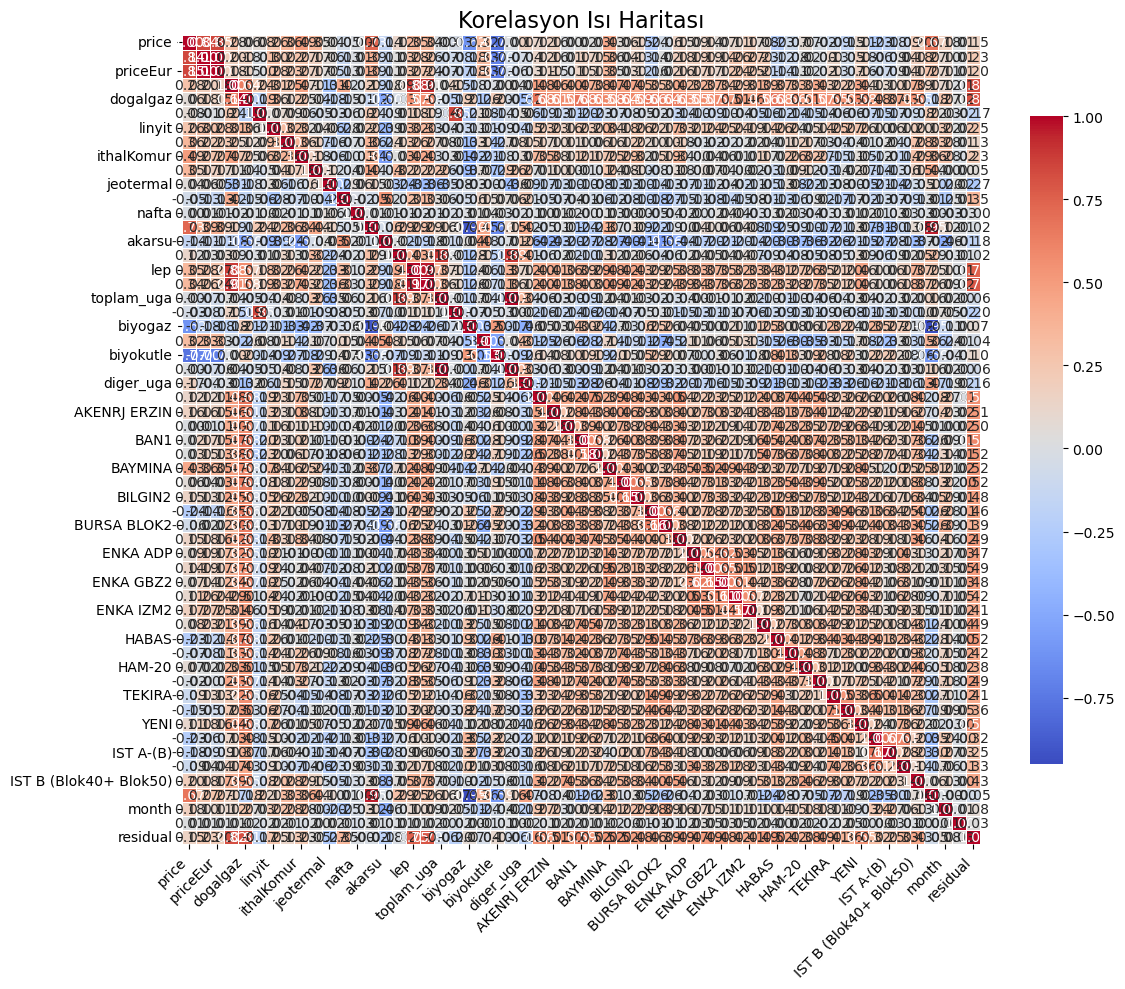

In [95]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Korelasyon Isı Haritası', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Kenar boşluklarını ayarlamak için
plt.show()

In [97]:
df['price'].mean(), df['price'].median(), df['price'].min(),df['price'].max(), df['price'].std()

(1558.0989057443364, 1514.8200000000002, 0.0, 4800.0, 1175.845776453837)

In [99]:
from scipy.stats import ttest_ind

In [101]:
#Ho: Price ve toplam üretim arasında bağ yoktur.
#Ha: Price ve toplam üretim arasında bağ vardır.
t,p=ttest_ind(df['price'],df['toplam'])  
p   # Ho reddet yani price ve toplam üretim anlamında anlamlı bir bağ vardır

0.0

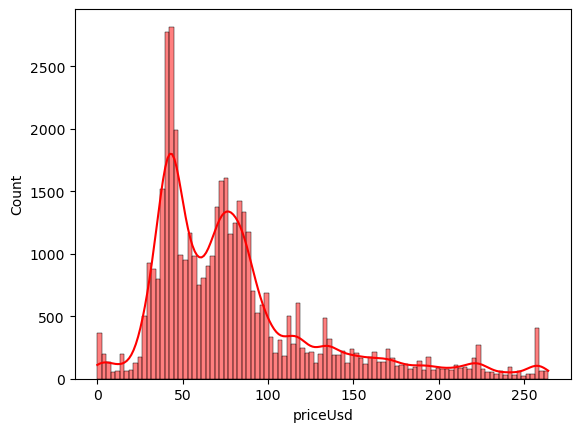

In [103]:
sns.histplot(x=df['priceUsd'],kde=True, color='red', bins=100);

In [107]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price                     1.000000
priceEur                  0.850633
priceUsd                  0.843379
biokutle                  0.730864
year                      0.671953
ithalKomur                0.492326
BAYMINA                   0.434257
tasKomur                  0.360619
fuelOil                   0.347982
lep                       0.346364
consumption               0.338784
kanalTipi                 0.318803
toplam                    0.281273
linyit                    0.260249
IST B (Blok40+ Blok50)    0.198876
month                     0.182741
ENKA IZM2                 0.171373
diger_uga                 0.166713
AKENRJ ERZIN              0.155789
residual                  0.153934
BILGIN2                   0.147375
CENGIZ                    0.146040
ENKA GBZ1                 0.137309
diger                     0.124651
ACWA                      0.117395
YENI                      0.108164
ENKA IZM1                 0.106565
ENKA ADP                  0.085938
GAMA ICAN           

In [130]:
x=df[['barajli','jeotermal','biokutle','kanalTipi','ithalKomur','akarsu','lep','ruzgar','linyit','gunes','toplam','residual','day_name','hour','month','diger','IST B (Blok40+ Blok50)','IST A-(B)','IST A-(A)','IST A-(C)','TEKIRA','HABAS','BURSA BLOK1','TEKIRB','ACWA','BAYMINA','RWE','ENKA IZM1','ENKA GBZ2','BILGIN1','ENKA ADP','GAMA ICAN','YENI','ENKA IZM2','AKENRJ ERZIN','IST B (Blok40+ Blok50)']] 
y=df[['price']]

In [132]:
#x=df[['lep','ruzgar','gunes','day_name','hour','month']] 
#y=df[['price']]

In [134]:
x=pd.get_dummies(x, drop_first=True)  

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [138]:
x_train.shape, x_test.shape

((35059, 63), (8765, 63))

### Modeling

In [141]:
lr=LinearRegression()

In [143]:
model=lr.fit(x_train,y_train) #makine Ogrenmesi

In [145]:
tahmin=model.predict(x_test)

In [147]:
mean_squared_error(y_test,tahmin) ** .5 

555.7059496314536

In [149]:
r2_score(y_test,tahmin)

0.7767154459525483

In [151]:
dt=DecisionTreeRegressor()

In [153]:
Dmodel=dt.fit(x_train,y_train)

In [154]:
tahmin2=dt.predict(x_test)

In [155]:
mean_squared_error(y_test,tahmin2)**.5

295.5383107062527

In [159]:
r2_score(y_test,tahmin2)

0.9368466836668243

In [161]:
from sklearn.ensemble import ExtraTreesRegressor

In [163]:
ET=ExtraTreesRegressor()

In [165]:
ETmodel=ET.fit(x_train,y_train)

In [166]:
tahmin6=ET.predict(x_test)

In [167]:
r2_score(y_test,tahmin6)

0.9748385739529728

In [168]:
GBR=GradientBoostingRegressor()

In [169]:
GBRmodel=GBR.fit(x_train,y_train)

In [170]:
tahmin7=ET.predict(x_test)

In [171]:
r2_score(y_test,tahmin7)

0.9748385739529728

In [179]:
feature_importance=pd.DataFrame({'Feature': x_train.columns,'Coefs':lr.coef_[0]})

In [183]:
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)

In [185]:
feature_importance

,Feature,Coefs
50,hour_11:00,491.940103
49,hour_10:00,475.251170
48,hour_09:00,446.115952
53,hour_14:00,395.658691
54,hour_15:00,318.837881
...,...,...
45,hour_06:00,-258.671266
44,hour_05:00,-307.904301
41,hour_02:00,-312.214275
43,hour_04:00,-334.240520


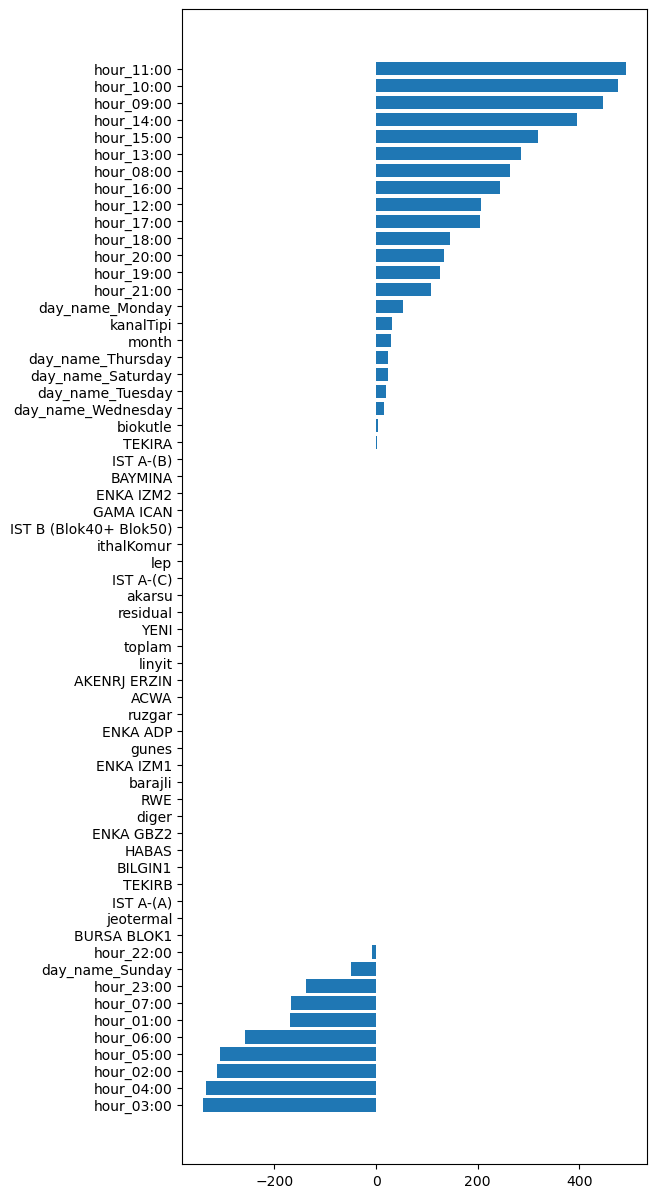

In [187]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [189]:
residuals=tahmin-y_test # y_test-tahmne de bakabilirdik. 

In [191]:
residuals

,price
21656,-716.651998
1570,227.878689
35359,207.048567
22943,-677.900961
32622,163.633297
...,...
36760,-107.810554
18865,-235.076622
26368,-880.862231
10421,-253.998505


<Axes: ylabel='Count'>

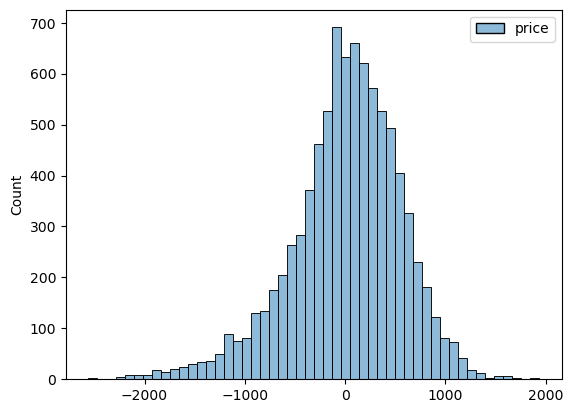

In [193]:
sns.histplot(residuals, bins=50)

In [103]:
# API Login
url_login = "https://api-markets.meteologica.com/api/v1/login"
payload = {"user": "RWE_Turcas", "password": "3oq5y>WE"}
response = requests.post(url_login, json=payload)
token = response.json().get("token")

# Function to fetch forecast data
def fetch_forecast(content_id, token):
    url_data = f"https://api-markets.meteologica.com/api/v1/contents/{content_id}/data"
    params = {"token": token}
    response = requests.get(url_data, params=params)
    if response.status_code == 200:
        data = response.json().get("data", [])
        df = pd.DataFrame(data)
        df["ID"] = content_id
        return df
    else:
        print(f"Error fetching data for content_id {content_id}: {response.status_code}")
        return pd.DataFrame()

# Content IDs for LEP (demand), wind, and solar forecasts
lep_id = 1439
wind_id = 1440
solar_id = 1446

# Fetch data for the next day
def prepare_tomorrow_data():
    tomorrow = datetime.now() + timedelta(days=1)
    tomorrow_start = tomorrow.replace(hour=0, minute=0, second=0, microsecond=0)
    tomorrow_end = tomorrow.replace(hour=23, minute=59, second=59, microsecond=0)

    lep_data = fetch_forecast(lep_id, token)
    wind_data = fetch_forecast(wind_id, token)
    solar_data = fetch_forecast(solar_id, token)

    # Filter data for tomorrow
    def filter_by_date(df):
        df["From yyyy-mm-dd hh:mm"] = pd.to_datetime(df["From yyyy-mm-dd hh:mm"])
        return df[(df["From yyyy-mm-dd hh:mm"] >= tomorrow_start) & (df["From yyyy-mm-dd hh:mm"] <= tomorrow_end)]

    lep_filtered = filter_by_date(lep_data)
    wind_filtered = filter_by_date(wind_data)
    solar_filtered = filter_by_date(solar_data)

    # Combine into a single DataFrame
    combined = pd.DataFrame({
        "hour": lep_filtered["From yyyy-mm-dd hh:mm"].dt.hour,
        "lep": lep_filtered["forecast"].values,
        "ruzgar": wind_filtered["forecast"].values,
        "gunes": solar_filtered["forecast"].values,
    })

    # Add constant columns for model compatibility
    combined["day_name"] = tomorrow.strftime("%A")
    combined["month"] = tomorrow.month
    return combined

# Prepare new data
tomorrow_data = prepare_tomorrow_data()

KeyError: 'forecast'

In [109]:
lep_data = fetch_forecast(lep_id, token)
wind_data = fetch_forecast(wind_id, token)
solar_data = fetch_forecast(solar_id, token)

# Gelen veriyi kontrol et
print("LEP Data Columns:", lep_data.columns)
print("Wind Data Columns:", wind_data.columns)
print("Solar Data Columns:", solar_data.columns)
print(lep_data.head())
print(wind_data.head())
print(solar_data.head())


LEP Data Columns: Index(['Average', 'Bottom', 'ENS00', 'ENS01', 'ENS02', 'ENS03', 'ENS04',
       'ENS05', 'ENS06', 'ENS07', 'ENS08', 'ENS09', 'ENS10', 'ENS11', 'ENS12',
       'ENS13', 'ENS14', 'ENS15', 'ENS16', 'ENS17', 'ENS18', 'ENS19', 'ENS20',
       'ENS21', 'ENS22', 'ENS23', 'ENS24', 'ENS25', 'ENS26', 'ENS27', 'ENS28',
       'ENS29', 'ENS30', 'ENS31', 'ENS32', 'ENS33', 'ENS34', 'ENS35', 'ENS36',
       'ENS37', 'ENS38', 'ENS39', 'ENS40', 'ENS41', 'ENS42', 'ENS43', 'ENS44',
       'ENS45', 'ENS46', 'ENS47', 'ENS48', 'ENS49', 'ENS50',
       'From yyyy-mm-dd hh:mm', 'To yyyy-mm-dd hh:mm', 'Top',
       'UTC offset from (UTC+/-hhmm)', 'UTC offset to (UTC+/-hhmm)', 'ID'],
      dtype='object')
Wind Data Columns: Index(['Average', 'Bottom', 'ENS00', 'ENS01', 'ENS02', 'ENS03', 'ENS04',
       'ENS05', 'ENS06', 'ENS07', 'ENS08', 'ENS09', 'ENS10', 'ENS11', 'ENS12',
       'ENS13', 'ENS14', 'ENS15', 'ENS16', 'ENS17', 'ENS18', 'ENS19', 'ENS20',
       'ENS21', 'ENS22', 'ENS23', 'ENS24', 

In [107]:
print(lep_data.columns)


NameError: name 'lep_data' is not defined